In [125]:
import numpy as np 
import pandas as pd

In [126]:
train = pd.read_csv('train.csv')

In [127]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [128]:
import matplotlib.pyplot as plt

# **EDA**

In [129]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [130]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

C:\Users\gs180\AppData\Local\Temp\ipykernel_3728\4051174490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True)


<AxesSubplot: >

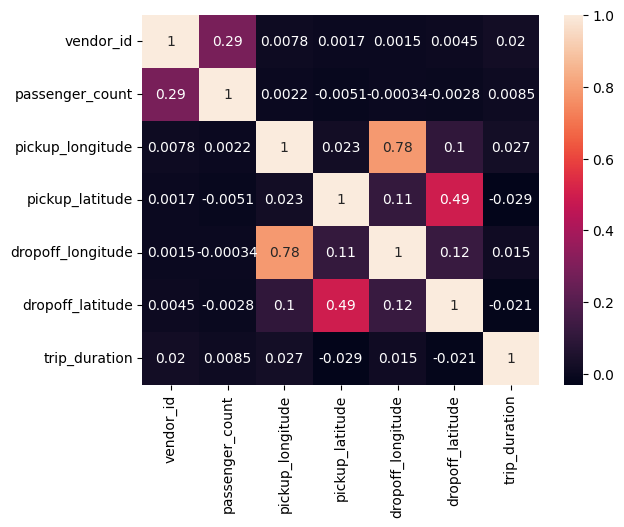

In [131]:
import seaborn as sns
sns.heatmap(train.corr(),annot = True)

array([[<AxesSubplot: title={'center': 'vendor_id'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'pickup_longitude'}>],
       [<AxesSubplot: title={'center': 'pickup_latitude'}>,
        <AxesSubplot: title={'center': 'dropoff_longitude'}>,
        <AxesSubplot: title={'center': 'dropoff_latitude'}>],
       [<AxesSubplot: title={'center': 'trip_duration'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

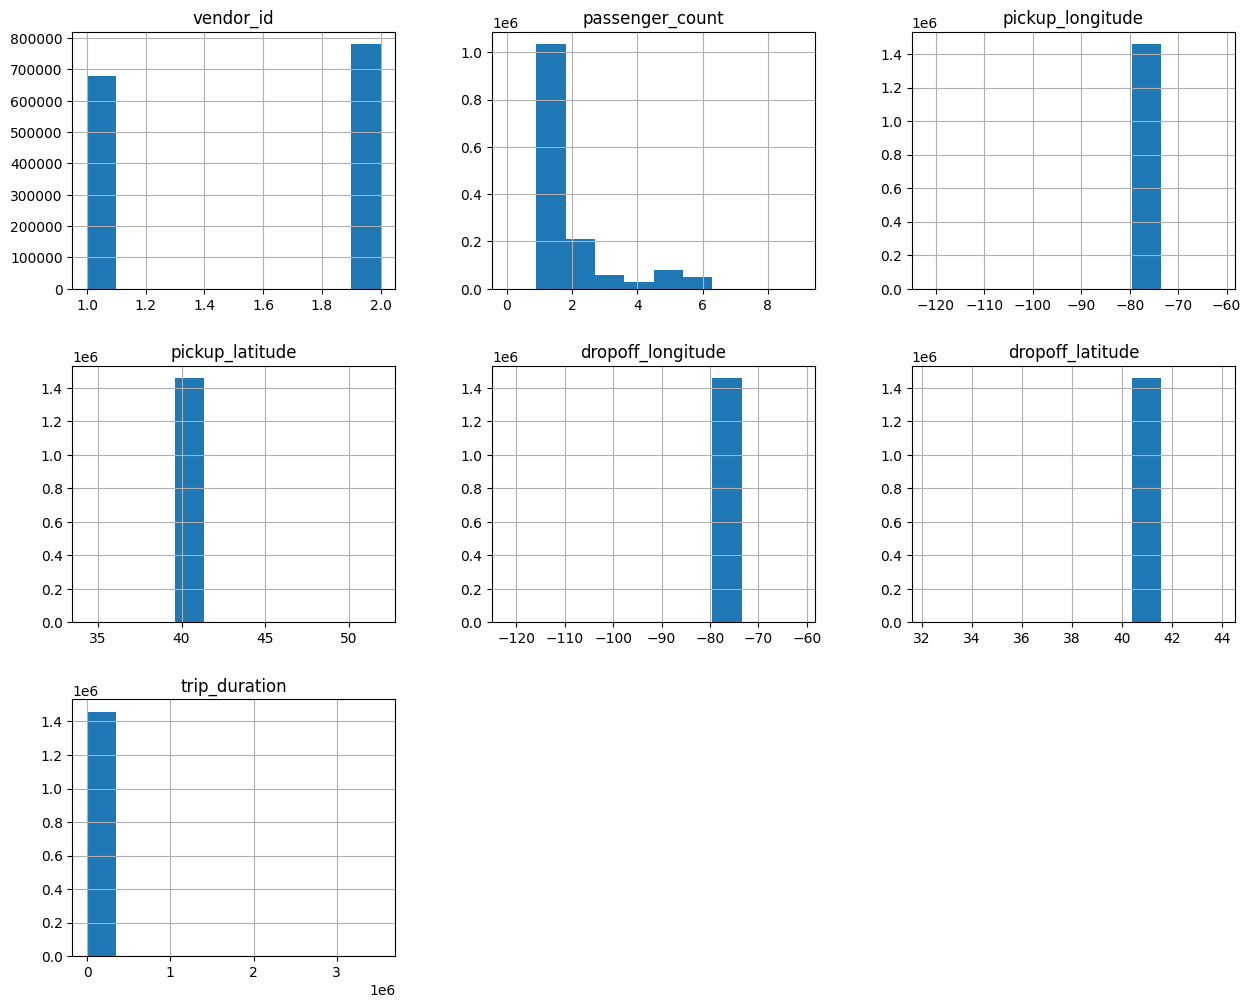

In [132]:
train.hist(figsize=(15,12))

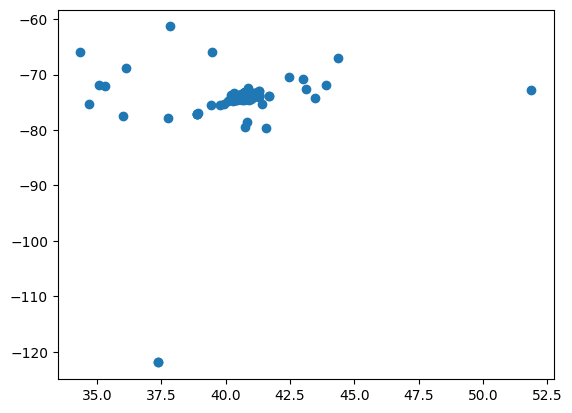

In [133]:
plt.scatter(train['pickup_latitude'],train['pickup_longitude'])

In [134]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [135]:
train['trip_duration'] = np.log(train['trip_duration'])

In [136]:
train["pickup_datetime"] =pd.to_datetime(train["pickup_datetime"])

In [137]:
train['hour'] = train['pickup_datetime'].dt.hour

In [138]:
train['day'] = train['pickup_datetime'].dt.dayofweek

In [139]:
train['month'] = train['pickup_datetime'].dt.month

In [140]:
train['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [141]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
hour                           int64
day                            int64
month                          int64
dtype: object

In [142]:
mapp = {'N':0,'Y':1}

In [143]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map(mapp)

In [144]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,17,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,19,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,13,5,3


In [145]:
train = train.drop(['id','vendor_id','pickup_datetime','dropoff_datetime'],axis=1)

In [146]:
train.dtypes

passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration         float64
hour                    int64
day                     int64
month                   int64
dtype: object

**Linear Regression**

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = train.drop(['trip_duration'], axis=1)
y = train['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5904016950944099


In [149]:
test = pd.read_csv('test.csv')

In [150]:
test.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

In [151]:
test = test.drop(['id','vendor_id'],axis=1)

In [152]:
test["pickup_datetime"] =pd.to_datetime(test["pickup_datetime"])

In [153]:
test['hour'] = test['pickup_datetime'].dt.hour
test['day'] = test['pickup_datetime'].dt.dayofweek
test['month'] = test['pickup_datetime'].dt.month

In [154]:
test= test.drop('pickup_datetime',axis=1)

In [155]:
test.dtypes

passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
hour                    int64
day                     int64
month                   int64
dtype: object

In [156]:
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map(mapp)

In [157]:
test.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,day,month
0,1,-73.988129,40.732029,-73.990173,40.756680,0,23,3,6
1,1,-73.964203,40.679993,-73.959808,40.655403,0,23,3,6
2,1,-73.997437,40.737583,-73.986160,40.729523,0,23,3,6
3,1,-73.956070,40.771900,-73.986427,40.730469,0,23,3,6
4,1,-73.970215,40.761475,-73.961510,40.755890,0,23,3,6


In [158]:
X_test = test

In [159]:
y_pred = model.predict(test)

In [160]:
test['trip_duration'] = y_pred

In [161]:
test

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,day,month,trip_duration
0,1,-73.988129,40.732029,-73.990173,40.756680,0,23,3,6,6.574217
1,1,-73.964203,40.679993,-73.959808,40.655403,0,23,3,6,6.921936
2,1,-73.997437,40.737583,-73.986160,40.729523,0,23,3,6,6.598369
3,1,-73.956070,40.771900,-73.986427,40.730469,0,23,3,6,6.562773
4,1,-73.970215,40.761475,-73.961510,40.755890,0,23,3,6,6.521748
...,...,...,...,...,...,...,...,...,...,...
625129,1,-74.003464,40.725105,-74.001251,40.733643,0,0,4,1,6.389777
625130,1,-74.006363,40.743782,-73.953407,40.782467,0,0,4,1,6.244171
625131,2,-73.972267,40.759865,-73.876602,40.748665,0,0,4,1,6.316054
625132,1,-73.976501,40.733562,-73.854263,40.891788,0,0,4,1,6.096884


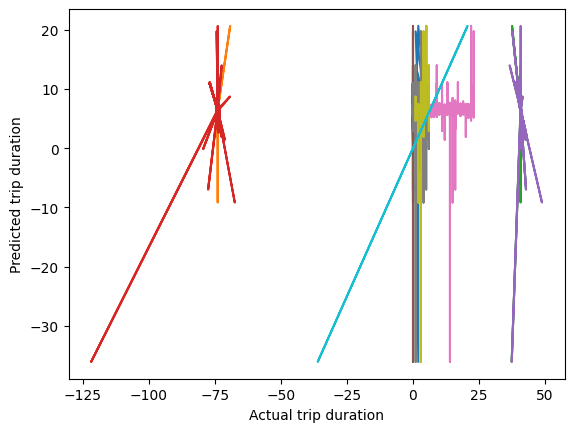

In [162]:
plt.plot(test, y_pred)
plt.xlabel("Actual trip duration")
plt.ylabel("Predicted trip duration")
plt.show()

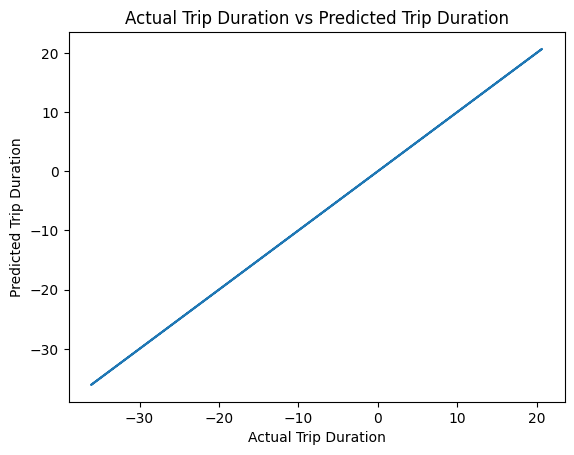

In [163]:
plt.plot(test['trip_duration'], y_pred)
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()

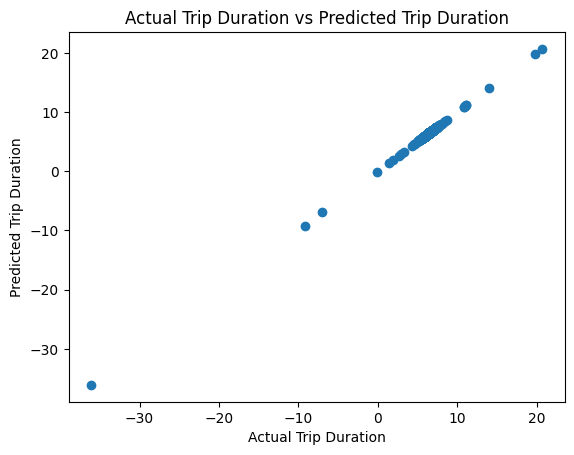

In [164]:
plt.scatter(test['trip_duration'], y_pred)
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()

In [165]:
accuracy = 1 - mae / (max(y_test) - min(y_pred))
print("Accuracy:", accuracy*100)

Accuracy: 98.75625964473984


In [166]:
testv = test.drop('trip_duration',axis=1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Lasso Regression**

In [168]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.6397538266491958
R-squared: 0.0011718686323800576


In [169]:
print(len(y_pred))
len(test['trip_duration'])

291729


625134

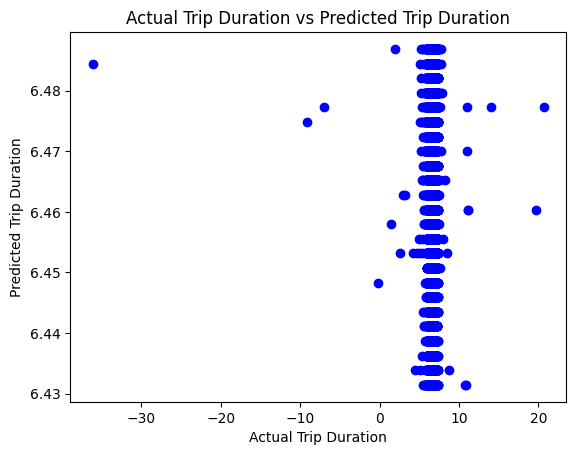

In [170]:
y_pred = np.resize(y_pred, (len(test['trip_duration']),))
plt.scatter(test['trip_duration'], y_pred, color='blue')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()

**Ridge Regression**

In [171]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.6087128519780914
R-squared: 0.0496351953606623


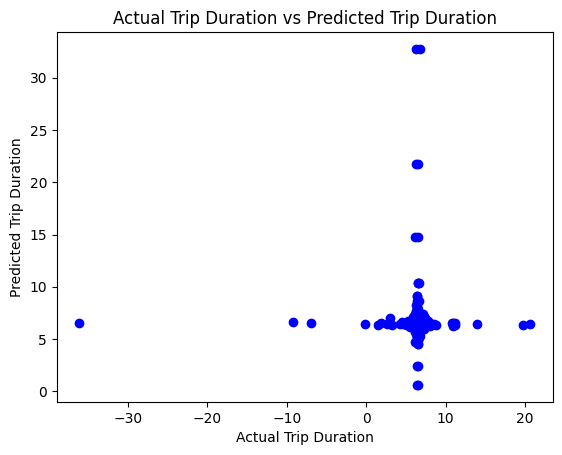

In [172]:
y_pred = np.resize(y_pred, (len(test['trip_duration']),))
plt.scatter(test['trip_duration'], y_pred, color='blue')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()

**Decision Tree Regression**

In [173]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.36606681213829223
R-squared: 0.4284710545009577


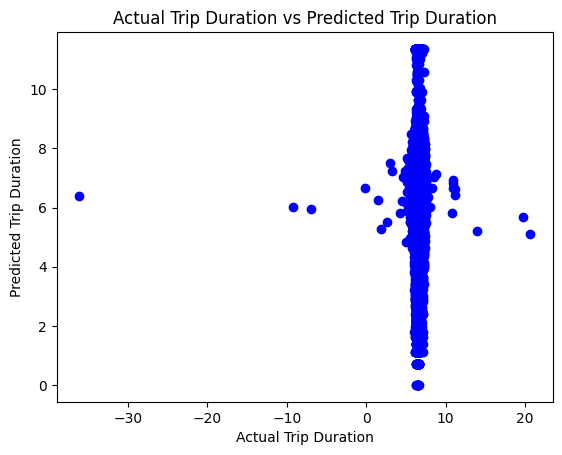

In [174]:
y_pred = np.resize(y_pred, (len(test['trip_duration']),))
plt.scatter(test['trip_duration'], y_pred, color='blue')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()

**Elastic Net Regression**

In [175]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha=0.01)
model_enet.fit(X_train, y_train)
pred_train_enet = model_enet.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_enet))
r2_train = r2_score(y_train, pred_train_enet)
print("RMSE (Training):", rmse_train)
print("R-squared (Training):", r2_train)
pred_test_enet = model_enet.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_enet))
r2_test = r2_score(y_test, pred_test_enet)
print("RMSE (Test):", rmse_test)
print("R-squared (Test):", r2_test)

RMSE (Training): 0.7967571647041944
R-squared (Training): 0.006689968123714807
RMSE (Test): 0.7975441725301301
R-squared (Test): 0.006912843142292235


C:\Users\gs180\AppData\Local\Temp\ipykernel_3728\927802725.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test['trip_duration'], y_pred, cmap='Blues')


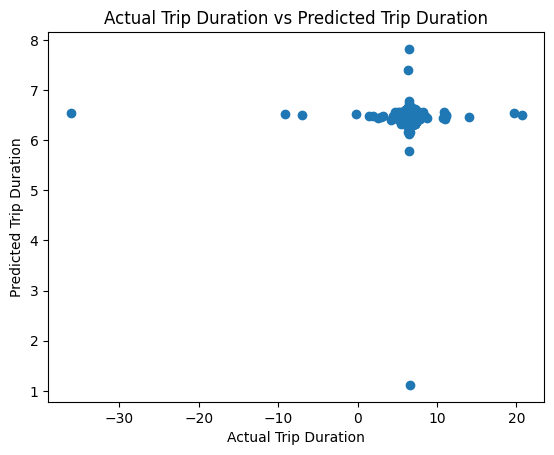

In [176]:
y_pred = np.resize(pred_train_enet, (len(test['trip_duration']),))
plt.scatter(test['trip_duration'], y_pred, cmap='Blues')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual Trip Duration vs Predicted Trip Duration')
plt.show()